# COVID19 Project

In [36]:
import pandas as pd, sys, matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta

#dtype changed to category from object to optimize runtime
df =  pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", dtype={'county': 'category', 
                                                                                                           'state': 'category'})
df.date = pd.to_datetime(df.date)
df['cases_diff'] = df.groupby(['county', 'state'])['cases'].diff()
df['deaths_diff'] = df.groupby(['county', 'state'])['deaths'].diff()

df.set_index(df.date, inplace=True, drop=True)
df.drop(columns=['date'], inplace=True)
df.index = df.index.astype('datetime64[ns]')
df.sort_index(ascending=False, inplace=True)

In [22]:
states = df.state.unique().tolist()
counties = df.county.unique().tolist()
fips = df.fips.unique().tolist()

total_cases = df.xs(df.index[0])['cases'].sum()
total_deaths = df.xs(df.index[0])['deaths'].sum()

def greatest_cases_yesterday():
    gcy = df.sort_values(by=['date', 'cases_diff'], ascending=False)
    return gcy.xs(df.index[0])

def greatest_deaths_yesterday():
    gdy = df.sort_values(by=['date', 'deaths_diff'], ascending=False)
    return gdy.xs(df.index[0])

def county_df(county, state=None):
    county_df = df[df['county'] == county].drop(columns=['county'])
    
    if state is not None:
        county_df = df[(df.county == county) & (df.state == state)]
        return county_df
    
    if county in states:
        return "{0} is not a county but a state.".format(county)
    
    also_in = county_df.state.unique()
    num_counties = len(also_in)
    
    if num_counties == 1:
        county_df.drop(columns=['state', 'fips'], axis=1, inplace=True)
        
    if num_counties > 1:
        return "{0} appears in {1}; please specify.".format(county, also_in)
    
    return county_df

#state_totals_df 

def state_df(state):
    if state not in states:
        return "{0} is not in database.".format(state)
    
    sdf = df[df.state == state].copy()
    
    counties = sdf.county.unique()
    
    sdf.sort_index(ascending=False, inplace=True)
    sdf.drop(columns=['fips'], inplace=True)
    return sdf

#if cases or deaths are the highest yesterday...
def yesterday():
    cases = df.xs(df.index[0])['cases_diff'].sum()
    deaths = df.xs(df.index[0])['deaths_diff'].sum()
    date =  df.index[0].strftime('%D')
    return "{0} cases and {1} deaths on {2}".format(cases, deaths, date)


# state as optional input
# What is the first date in the index of the state_df? 
def daily_totals(state=None):
    if state is None:
        index = df.index.unique()
        data = {'cases': [df.xs(i)['cases_diff'].sum() for i in index],
               'deaths': [df.xs(i)['deaths_diff'].sum() for i in index]}
        df2 = pd.DataFrame(data, index)

    if state:
        index = state_df(state).index.unique()
        data = {'cases': [state_df(state).xs(i)['cases_diff'].sum() for i in index],
               'deaths': [state_df(state).xs(i)['deaths_diff'].sum() for i in index]}
        df2 = pd.DataFrame(data, index)
        return df2
    else:
        return df2

In [59]:
yesterday()

'202332.0 cases and 1522.0 deaths on 12/07/20'

In [6]:
daily_totals()['cases'].idxmax().strftime("%D"), daily_totals()['deaths'].idxmax().strftime("%D")

('12/04/20', '12/02/20')

In [42]:
daily_totals()['cases'].sum(), daily_totals()['deaths'].sum()

(15025767.0, 285173.0)

In [8]:
for i in state_df("New Jersey").index.unique():
    date = i.date()
    cases = state_df("New Jersey").xs(i)['cases_diff'].sum()
    deaths = state_df("New Jersey").xs(i)['deaths_diff'].sum()
    print("{0}, {1}, {2}".format(date, cases, deaths))

2020-12-07, 3563.0, 15.0
2020-12-06, 6030.0, 15.0
2020-12-05, 5324.0, 51.0
2020-12-04, 5663.0, 46.0
2020-12-03, 4793.0, 64.0
2020-12-02, 4303.0, 62.0
2020-12-01, 4606.0, 90.0
2020-11-30, 3190.0, 15.0
2020-11-29, 3839.0, 13.0
2020-11-28, 3802.0, 23.0
2020-11-27, 4095.0, 17.0
2020-11-26, 4473.0, 39.0
2020-11-25, 4059.0, 67.0
2020-11-24, 4275.0, 47.0
2020-11-23, 3581.0, 11.0
2020-11-22, 3968.0, 15.0
2020-11-21, 4669.0, 34.0
2020-11-20, 3626.0, 23.0
2020-11-19, 4182.0, 34.0
2020-11-18, 4054.0, 37.0
2020-11-17, 4026.0, 38.0
2020-11-16, 2219.0, 14.0
2020-11-15, 4538.0, 18.0
2020-11-14, 4353.0, 26.0
2020-11-13, 3397.0, 27.0
2020-11-12, 3492.0, 19.0
2020-11-11, 3065.0, 15.0
2020-11-10, 3777.0, 21.0
2020-11-09, 2058.0, 11.0
2020-11-08, 2013.0, 4.0
2020-11-07, 3202.0, 9.0
2020-11-06, 2161.0, 13.0
2020-11-05, 1962.0, 12.0
2020-11-04, 2443.0, 20.0
2020-11-03, 1824.0, 14.0
2020-11-02, 1368.0, 3.0
2020-11-01, 1743.0, 4.0
2020-10-31, 1363.0, 11.0
2020-10-30, 1976.0, 7.0
2020-10-29, 1550.0, 8.0
2020-1

<AxesSubplot:xlabel='date'>

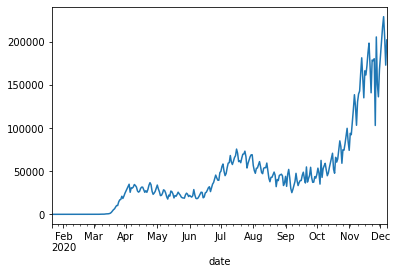

In [9]:
daily_totals()['cases'].plot()

<AxesSubplot:xlabel='date'>

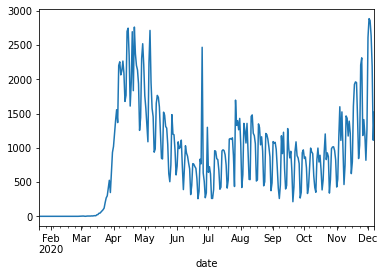

In [10]:
daily_totals()['deaths'].plot()

In [11]:
index = states
data = {'cases': [state_df(state).xs(df.index[0])['cases_diff'].sum() for state in states],
        'deaths': [state_df(state).xs(df.index[0])['deaths_diff'].sum() for state in states]}
df3 = pd.DataFrame(data, index)

In [12]:
df3.sort_values(['cases'], ascending=False)

,cases,deaths
California,27227.0,115.0
Texas,14020.0,71.0
Michigan,9557.0,102.0
Ohio,9273.0,63.0
Illinois,8867.0,107.0
Pennsylvania,8582.0,42.0
Connecticut,8129.0,78.0
Tennessee,7930.0,65.0
Florida,7711.0,105.0
New York,7318.0,85.0


In [4]:
for state in states:
    cases = state_df(state).xs(df.index[0])['cases_diff'].sum()
    deaths = state_df(state).xs(df.index[0])['deaths_diff'].sum()
    print("{0}, {1}, {2}".format(state, cases, deaths))

Wyoming, 571.0, 27.0
Kentucky, 3784.0, 61.0
Louisiana, 2743.0, 23.0
Maine, 346.0, 2.0
Maryland, 2044.0, 49.0
Iowa, 2563.0, 85.0
Kansas, 632.0, 0.0
Mississippi, 2168.0, 28.0
Missouri, 4108.0, 89.0
Montana, 843.0, 10.0
Michigan, 8124.0, 192.0
Massachusetts, 6675.0, 50.0
Minnesota, 6149.0, 92.0
Colorado, 5455.0, 109.0
California, 21846.0, 146.0
Florida, 10870.0, 98.0
Georgia, 5538.0, 76.0
District of Columbia, 322.0, 2.0
Delaware, 758.0, 0.0
Connecticut, 4751.0, 20.0
Alabama, 3531.0, 65.0
Alaska, 763.0, 8.0
Arizona, 5209.0, 79.0
Arkansas, 2789.0, 33.0
Illinois, 11001.0, 217.0
Indiana, 8460.0, 60.0
Idaho, 1632.0, 21.0
Hawaii, 139.0, 2.0
Guam, 22.0, 0.0
Texas, 17322.0, 223.0
South Carolina, 2228.0, 22.0
South Dakota, 1145.0, 38.0
Tennessee, 3684.0, 92.0
West Virginia, 1120.0, 11.0
Washington, 2196.0, 61.0
Virginia, 2023.0, 34.0
Wisconsin, 5604.0, 66.0
Vermont, 181.0, 1.0
Utah, 4035.0, 12.0
Virgin Islands, 0.0, 0.0
New York, 9853.0, 60.0
North Carolina, 5845.0, 48.0
New Mexico, 1910.0, 44.0


In [10]:
state_df("New Jersey").xs(df.index[0]).sort_values(by=['cases_diff'], ascending=False)

,county,state,cases,deaths,cases_diff,deaths_diff,pct_change
date,,,,,,,
2020-12-03,Bergen,New Jersey,36478,2153.0,500.0,8.0,0.013897
2020-12-03,Essex,New Jersey,36787,2250.0,472.0,10.0,0.012997
2020-12-03,Middlesex,New Jersey,32233,1508.0,450.0,8.0,0.014159
2020-12-03,Hudson,New Jersey,33057,1596.0,433.0,9.0,0.013272
2020-12-03,Camden,New Jersey,20288,688.0,389.0,1.0,0.019549
2020-12-03,Ocean,New Jersey,22986,1145.0,373.0,10.0,0.016495
2020-12-03,Monmouth,New Jersey,21713,912.0,354.0,2.0,0.016574
2020-12-03,Union,New Jersey,29466,1444.0,326.0,3.0,0.011187
2020-12-03,Passaic,New Jersey,31484,1329.0,293.0,5.0,0.009394


<AxesSubplot:xlabel='date'>

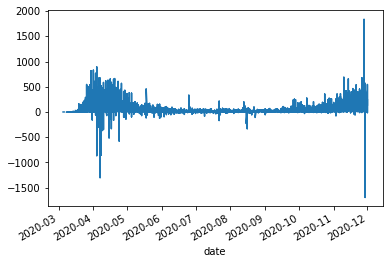

In [17]:
state_df("New Jersey")['cases_diff'].plot()

<AxesSubplot:xlabel='date'>

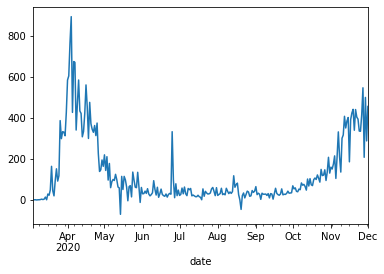

In [18]:
county_df("Bergen")['cases_diff'].plot()

In [19]:
state_df("New Jersey").sort_values(by=['cases_diff'], ascending=False)['cases_diff'].sum()

343707.0

<AxesSubplot:xlabel='date'>

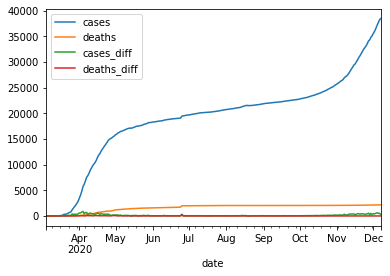

In [43]:
county_df("Bergen").sort_index(ascending=True).plot()

<AxesSubplot:xlabel='date'>

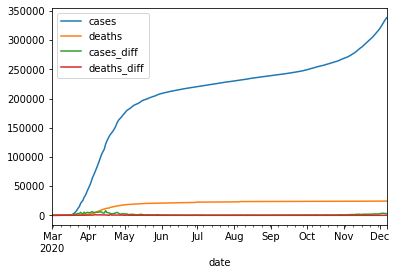

In [44]:
county_df("New York City").sort_index(ascending=True).plot()

<AxesSubplot:xlabel='date'>

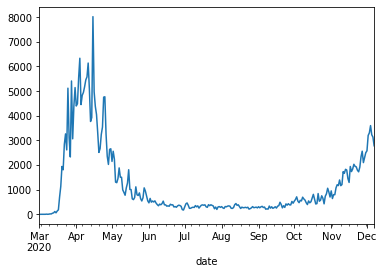

In [45]:
county_df("New York City").cases_diff.plot()

<AxesSubplot:xlabel='date'>

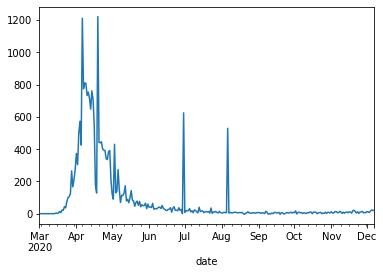

In [46]:
county_df("New York City").deaths_diff.plot()

In [50]:
df.index.date[0].strftime("%A"), df.index.date[0].strftime("%d"), df.index.date[0].strftime("%B")

('Monday', '07', 'December')

#### list comprehension into separate dataframe?

In [29]:
for month in df.index.strftime("%B").unique():
    print(month)

November
October
September
August
July
June
May
April
March
February
January


In [9]:
for month in df.index.month.unique():
    print(month, df[df.index.month == month]['cases_diff'].sum())

11 4411981.0
10 1946627.0
9 1217119.0
8 1473763.0
7 1917749.0
6 852437.0
5 721813.0
4 886531.0
3 185327.0
2 34.0
1 1.0


In [24]:
for week in df.index.isocalendar().week.unique():
    print(week, df[df.index.isocalendar().week == week]['cases_diff'].sum())

49 351939.0
48 1134051.0
47 1199731.0
46 1052521.0
45 783697.0
44 580267.0
43 489173.0
42 398390.0
41 370208.0
40 305972.0
39 313471.0
38 287735.0
37 245475.0
36 283766.0
35 295135.0
34 296183.0
33 361201.0
32 377139.0
31 434918.0
30 458787.0
29 465424.0
28 407471.0
27 346667.0
26 271399.0
25 187867.0
24 151167.0
23 154104.0
22 147870.0
21 157697.0
20 157061.0
19 169385.0
18 194502.0
17 213367.0
16 199454.0
15 219768.0
14 194865.0
13 108172.0
12 28537.0
11 2630.0
10 351.0
9 41.0
8 3.0
7 1.0
6 0.0
5 2.0
4 0.0


In [17]:
df[df.index.isocalendar().week == df.index.isocalendar().week[-1]]

,county,state,fips,cases,deaths,cases_diff,deaths_diff,pct_change
date,,,,,,,,
2020-01-26,Snohomish,Washington,53061.0,1,0,0.0,0.0,0.0
2020-01-26,Cook,Illinois,17031.0,1,0,0.0,0.0,0.0
2020-01-26,Orange,California,6059.0,1,0,0.0,0.0,0.0
2020-01-26,Los Angeles,California,6037.0,1,0,NaN,NaN,NaN
2020-01-26,Maricopa,Arizona,4013.0,1,0,NaN,NaN,NaN
2020-01-25,Snohomish,Washington,53061.0,1,0,0.0,0.0,0.0
2020-01-25,Cook,Illinois,17031.0,1,0,0.0,0.0,0.0
2020-01-25,Orange,California,6059.0,1,0,NaN,NaN,NaN
2020-01-24,Snohomish,Washington,53061.0,1,0,0.0,0.0,0.0


#### Alternate method for finding total cases:

In [18]:
df[df.index.dayofyear == df.index.dayofyear.max()]['cases'].sum()

12492056

##### last day of the first week

In [19]:
df[df.index.isocalendar().week == df.index.isocalendar().week[-1]].index.max().date()

datetime.date(2020, 1, 26)

In [17]:
df.index[0].strftime("%D"), state_df('New Jersey').xs(df.index[0])['cases_diff'].sum(), state_df('New Jersey').xs(df.index[0])['deaths_diff'].sum()

('12/06/20', 6030.0, 15.0)

<AxesSubplot:xlabel='date'>

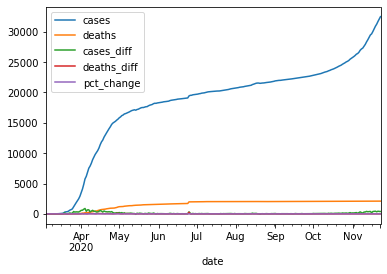

In [21]:
county_df("Bergen").plot()

<AxesSubplot:xlabel='date'>

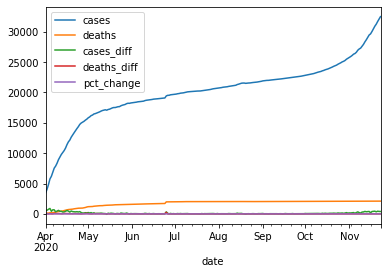

In [22]:
df[(df.index.month >= 4) & (df.state == 'New Jersey') & (df.county == 'Bergen')].drop(columns=['fips']).plot()

In [23]:
county_df("Bergen")

,cases,deaths,cases_diff,deaths_diff,pct_change
date,,,,,
2020-11-23,32491,2102,394.0,1.0,0.012275
2020-11-22,32097,2101,404.0,0.0,0.012747
2020-11-21,31693,2101,441.0,3.0,0.014111
2020-11-20,31252,2098,340.0,2.0,0.010999
2020-11-19,30912,2096,442.0,5.0,0.014506
...,...,...,...,...,...
2020-03-08,4,0,1.0,0.0,0.333333
2020-03-07,3,0,0.0,0.0,0.000000
2020-03-06,3,0,1.0,0.0,0.500000


In [32]:
state_df("New Jersey").index[0]

Timestamp('2020-11-22 00:00:00')

In [24]:
county_df("New York City")['cases_diff'].idxmax().date(), county_df("New York City")['cases_diff'].max()

(datetime.date(2020, 4, 15), 8021.0)

<AxesSubplot:xlabel='date'>

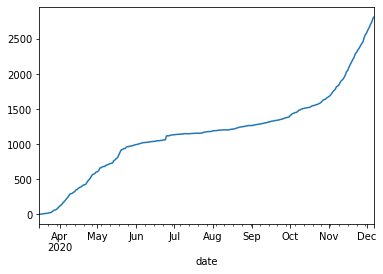

In [33]:
county_df("Hunterdon")['cases'].plot()

In [31]:
county_df("Hunterdon")

,cases,deaths,cases_diff,deaths_diff
date,,,,
2020-12-07,2819,132.0,23.0,0.0
2020-12-06,2796,132.0,55.0,0.0
2020-12-05,2741,132.0,34.0,0.0
2020-12-04,2707,132.0,42.0,0.0
2020-12-03,2665,132.0,34.0,0.0
...,...,...,...,...
2020-03-20,11,0.0,3.0,0.0
2020-03-19,8,0.0,2.0,0.0
2020-03-18,6,0.0,2.0,0.0
